In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [2]:
house_pricing_data_combined = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/housing-cleaned.csv")
house_pricing_data_bristol = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/bristol-cleaned.csv")
house_pricing_data_cornwall = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/cornwall-cleaned.csv")

bristol_broadband_data = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/bristol-broadband-cleaned.csv")
cornwall_broadband_data = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/cornwall-broadband-cleaned.csv")
combined_broadband_data = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/combined-broadband-cleaned.csv")

In [15]:
bristol_broadband_data.columns

Index(['postcode', 'postcode_space', 'postcode area',
       'Average_download_speed_Mbit_s', 'Maximum_download_speed_Mbit_s',
       'Minimum_download_speed_Mbit_s', 'Average_upload_speed_Mbit_s',
       'Maximum_upload_speed_Mbit_s', 'Minimum_upload_speed_Mbit_s',
       'Average_data_usage_GB', 'All Premises', 'All Matched Premises',
       'lsoa_area', 'county'],
      dtype='object')

In [12]:
house_pricing_data_bristol.columns

Index(['sell_id', 'house_sell_price', 'sold_year', 'postcode', 'house-type',
       'town/city', 'district', 'county', 'short_postal_code'],
      dtype='object')

In [3]:
house_pricing_data_bristol['sold_year'] = pd.to_datetime(house_pricing_data_bristol['sold_year']).dt.year
house_pricing_data_cornwall['sold_year'] = pd.to_datetime(house_pricing_data_cornwall['sold_year']).dt.year


In [4]:
house_pricing_data_bristol['house_sell_price'] = house_pricing_data_bristol['house_sell_price'] / 10000
house_pricing_data_cornwall['house_sell_price'] = house_pricing_data_cornwall['house_sell_price'] / 10000

Filtering for matching postcodes in housing and broadband data

In [10]:
matching_postcodes_bristol = set(house_pricing_data_bristol['postcode']).intersection(set(bristol_broadband_data['postcode_space']))
print(len(matching_postcodes_bristol)) 

matching_postcodes_cornwall = set(house_pricing_data_cornwall['postcode']).intersection(set(cornwall_broadband_data['postcode_space']))
print(len(matching_postcodes_cornwall))  


7302
10869


Filtering for 2022

In [6]:
year_check_bristol = house_pricing_data_bristol[house_pricing_data_bristol['sold_year'] == 2022]
print(len(year_check_bristol)) 

year_check_cornwall = house_pricing_data_cornwall[house_pricing_data_cornwall['sold_year'] == 2022]
print(len(year_check_cornwall)) 


7788
11385


Mergin broadband and housing data for 2022

In [7]:

bristol_data_2022 = pd.merge(
    house_pricing_data_bristol,
    bristol_broadband_data,
    left_on='postcode',
    right_on='postcode_space'
).query('sold_year == 2022')[['house_sell_price', 'Average_download_speed_Mbit_s']]

print(len(bristol_data_2022))


6942


In [8]:
correlation_bristol = bristol_data_2022[['house_sell_price', 'Average_download_speed_Mbit_s']].corr().iloc[0, 1]
print(correlation_bristol) 


-0.013070161870475256


In [9]:
X_bristol = sm.add_constant(bristol_data_2022['Average_download_speed_Mbit_s'])
model_bristol = sm.OLS(bristol_data_2022['house_sell_price'], X_bristol).fit()
print(model_bristol.summary()) 

intercept_bristol, slope_bristol = model_bristol.params

                            OLS Regression Results                            
Dep. Variable:       house_sell_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.186
Date:                Mon, 19 Aug 2024   Prob (F-statistic):              0.276
Time:                        15:54:45   Log-Likelihood:                -37575.
No. Observations:                6942   AIC:                         7.515e+04
Df Residuals:                    6940   BIC:                         7.517e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

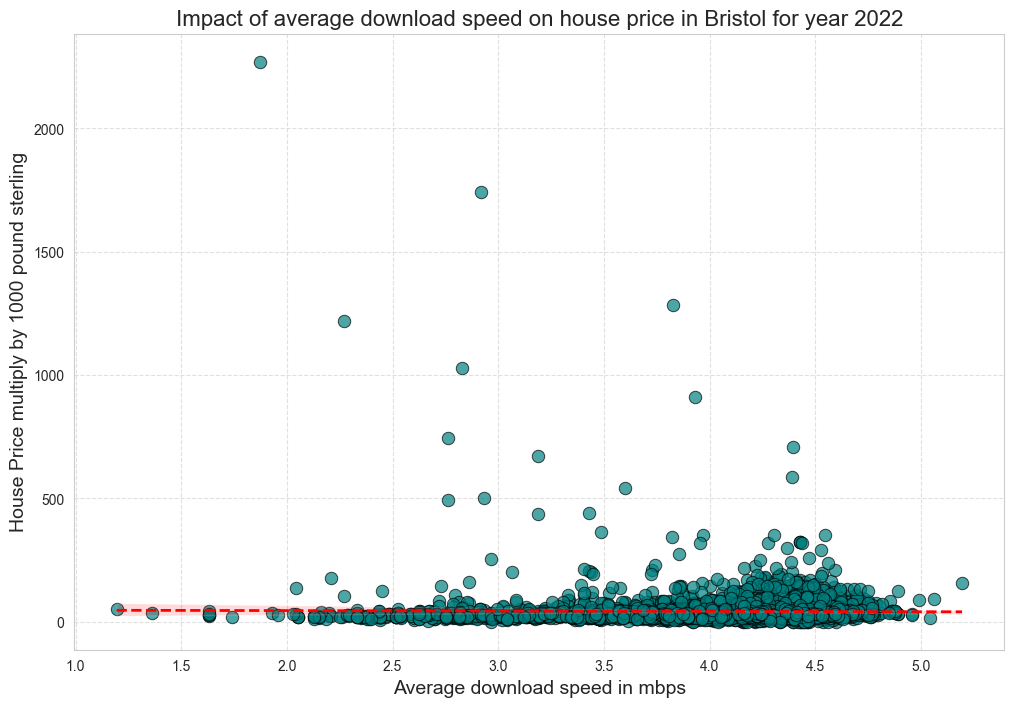

In [29]:
sns.set_style(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Average_download_speed_Mbit_s', y='house_sell_price', 
                data=bristol_data_2022, color='teal', s=80, edgecolor='black', alpha=0.7)
sns.regplot(x='Average_download_speed_Mbit_s', 
            y='house_sell_price', 
            data=bristol_data_2022, 
            scatter=False, color='red', line_kws={"linewidth":2, "linestyle":"--"})
plt.title('Impact of average download speed on house price in Bristol for year 2022', fontsize=16)
plt.xlabel('Average download speed in mbps', fontsize=14)
plt.ylabel('House Price multiply by 1000 pound sterling', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [31]:
cornwall_data_2022 = pd.merge(
    house_pricing_data_cornwall,
    cornwall_broadband_data,
    left_on='postcode',
    right_on='postcode_space'
).query('sold_year == 2022')[['house_sell_price', 'Average_download_speed_Mbit_s']]

print(len(cornwall_data_2022))  

9174


In [32]:
correlation_cornwall = cornwall_data_2022[['house_sell_price', 'Average_download_speed_Mbit_s']].corr().iloc[0, 1]
print(correlation_cornwall) 

-0.019416504115162655


In [34]:
X_cornwall = sm.add_constant(cornwall_data_2022['Average_download_speed_Mbit_s'])
model_cornwall = sm.OLS(cornwall_data_2022['house_sell_price'], X_cornwall).fit()
print(model_cornwall.summary()) 

intercept_cornwall, slope_cornwall = model_cornwall.params


                            OLS Regression Results                            
Dep. Variable:       house_sell_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.459
Date:                Mon, 19 Aug 2024   Prob (F-statistic):             0.0629
Time:                        14:45:14   Log-Likelihood:                -47380.
No. Observations:                9174   AIC:                         9.476e+04
Df Residuals:                    9172   BIC:                         9.478e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

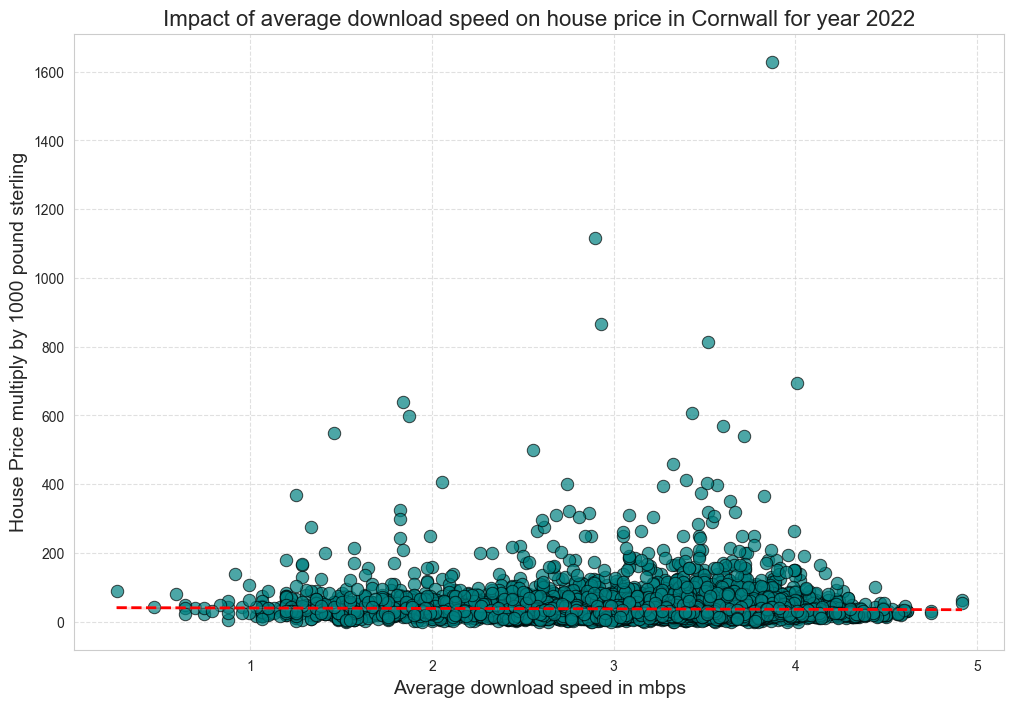

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Average_download_speed_Mbit_s', y='house_sell_price', 
                data=cornwall_data_2022, color='teal', s=80, edgecolor='black', alpha=0.7)
sns.regplot(x='Average_download_speed_Mbit_s', 
            y='house_sell_price', 
            data=cornwall_data_2022, 
            scatter=False, color='red', line_kws={"linewidth":2, "linestyle":"--"})
plt.title('Impact of average download speed on house price in Cornwall for year 2022', fontsize=16)
plt.xlabel('Average download speed in mbps', fontsize=14)
plt.ylabel('House Price multiply by 1000 pound sterling', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()